## 0. Introduction
this notebook shows the data analysis steps and insights


In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
def plot_percentages(df, col):
    temp = (
        df.groupby(col)['Churn']
        .value_counts(normalize=True)
        .rename('percentage')
        .mul(100)
        .reset_index()
    )

    plt.figure(figsize=(5,4))
    sns.barplot(data=temp, x=col, y='percentage', hue='Churn')
    plt.title(f"{col} — Churn % distribution")
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=45)
    plt.show()

In [156]:
df_churn = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [157]:
print("Dataset shape:", df_churn.shape)
print("\nDtypes:")
print(df_churn.dtypes)
print("\nMissing values:")
print(df_churn.isna().sum())

Dataset shape: (7043, 21)

Dtypes:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract        

Class balance for churn 

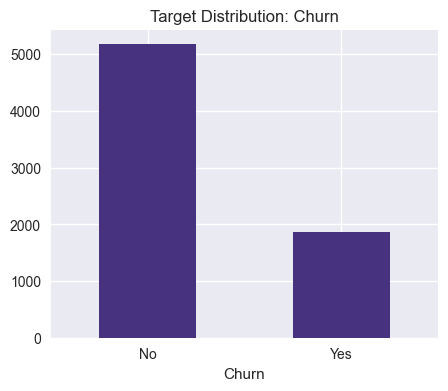

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [158]:
plt.figure(figsize=(5,4))
df_churn['Churn'].value_counts().plot(kind='bar')
plt.title("Target Distribution: Churn")
plt.xticks(rotation=0)
plt.show()

print(df_churn['Churn'].value_counts(normalize=True))

In [175]:
ratio = 0.73463 / 0.26537
ratio

2.768323472886913

numeric fetures destribution

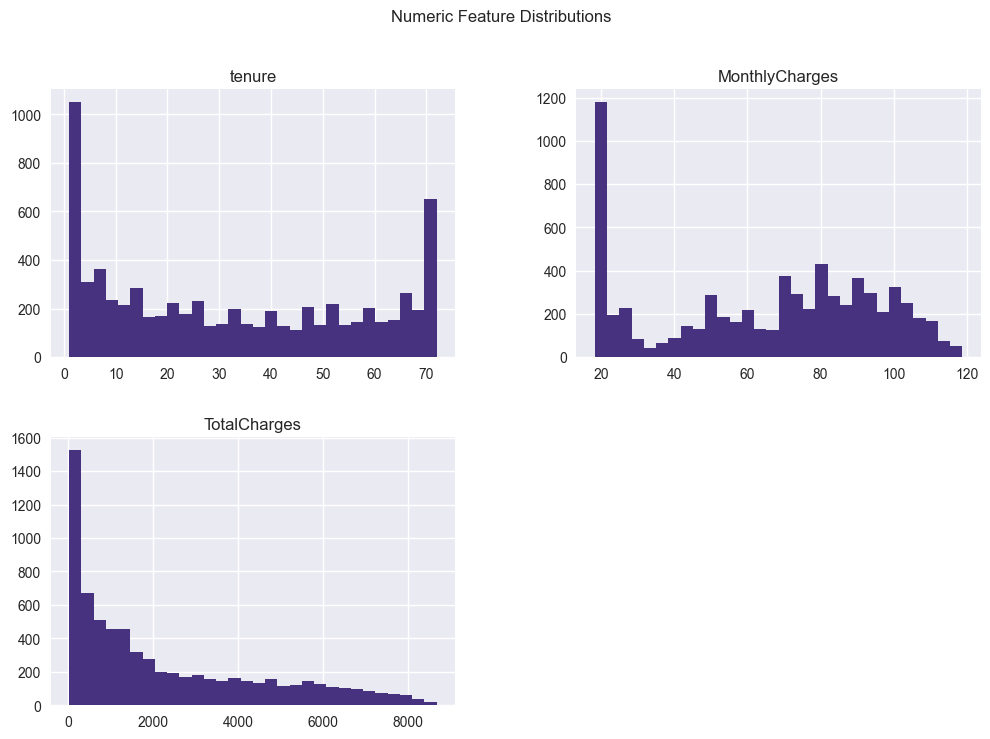

In [170]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

df_churn[numeric_cols].hist(bins=30, figsize=(12,8))
plt.suptitle("Numeric Feature Distributions")
plt.show()

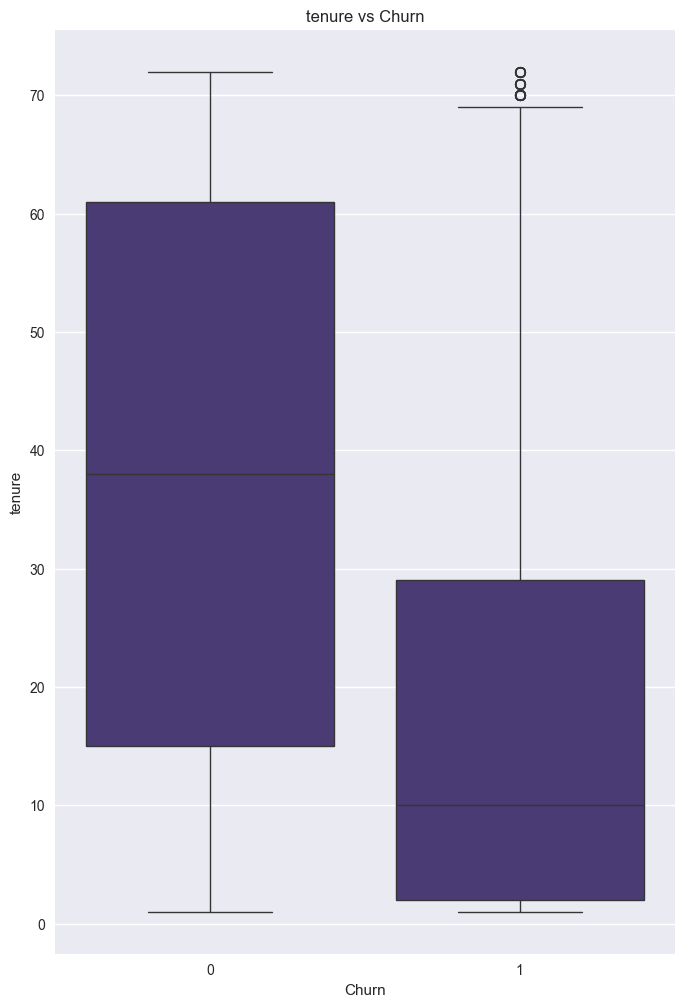

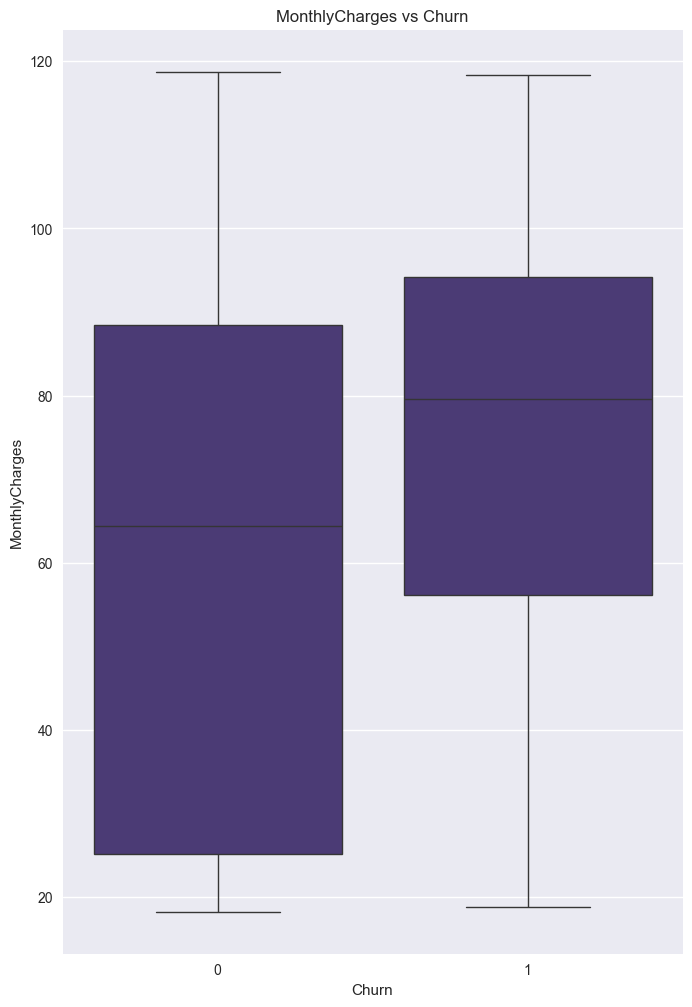

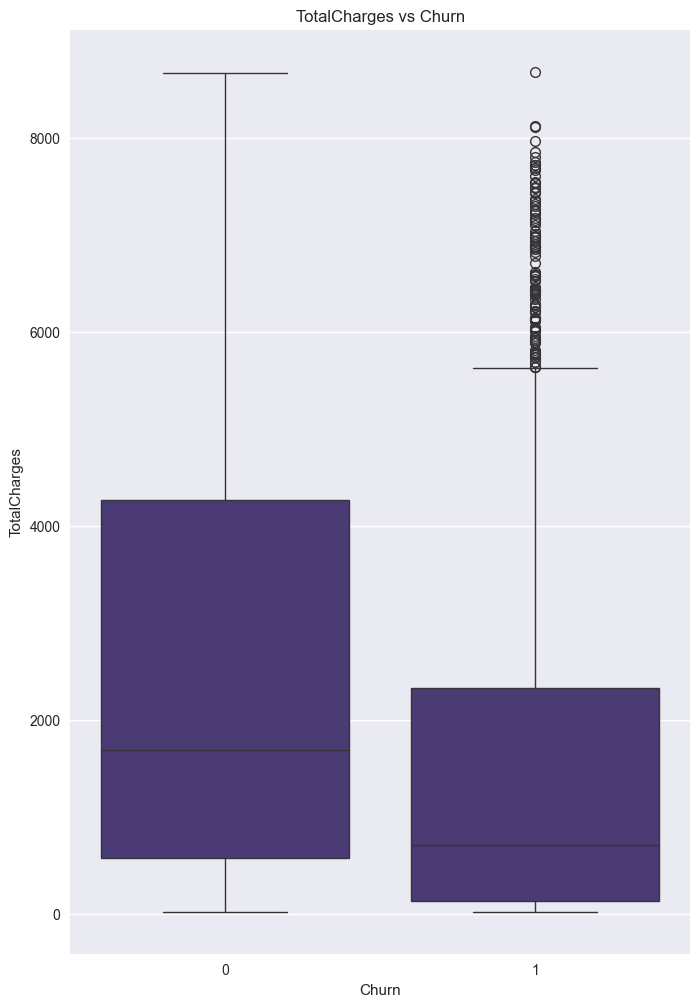

In [173]:
for col in numeric_cols:
    plt.figure(figsize=(8,12))
    sns.boxplot(x=df_churn['Churn'], y=df_churn[col])
    plt.title(f"{col} vs Churn")
    plt.show()

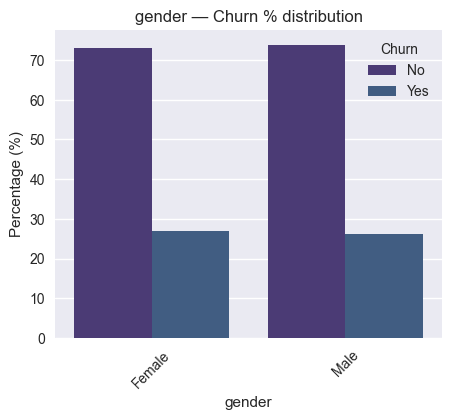

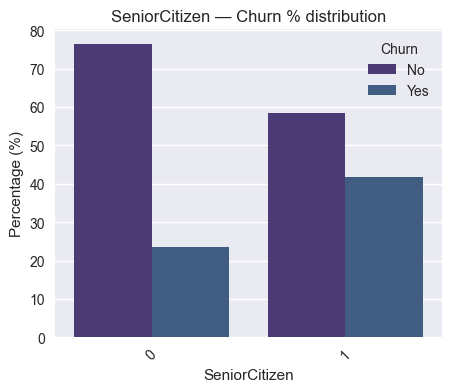

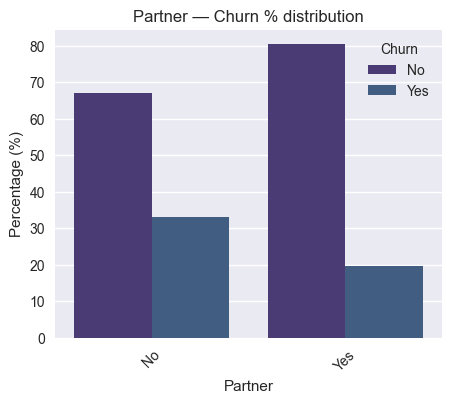

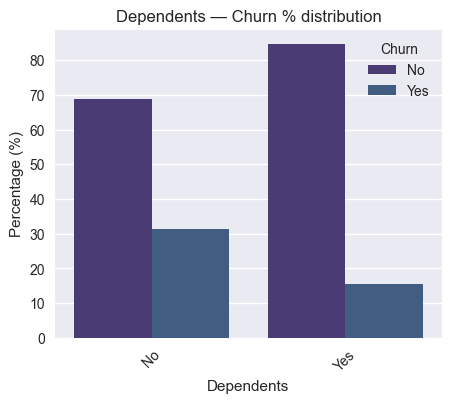

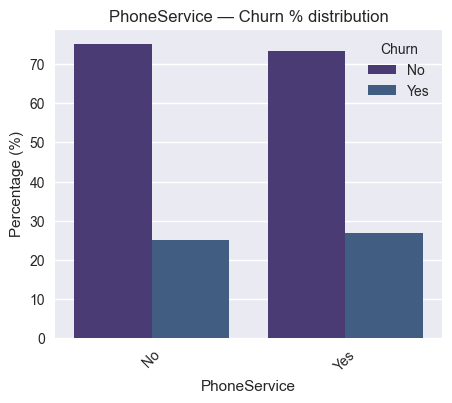

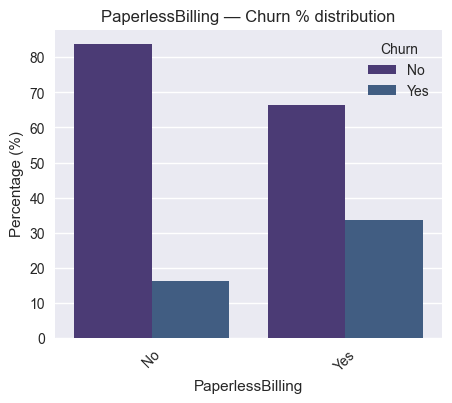

In [161]:
cat_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'PaperlessBilling'
]

for col in cat_cols:
    plot_percentages(df_churn, col)


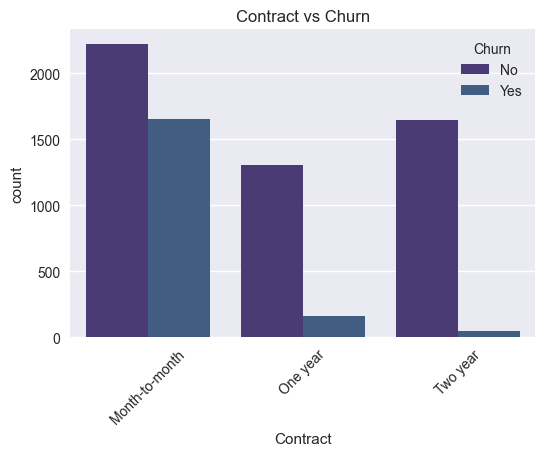

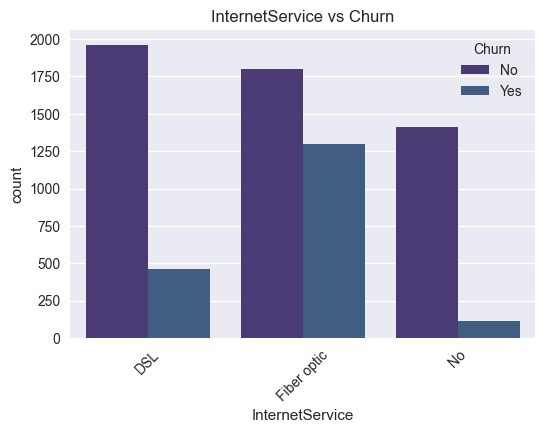

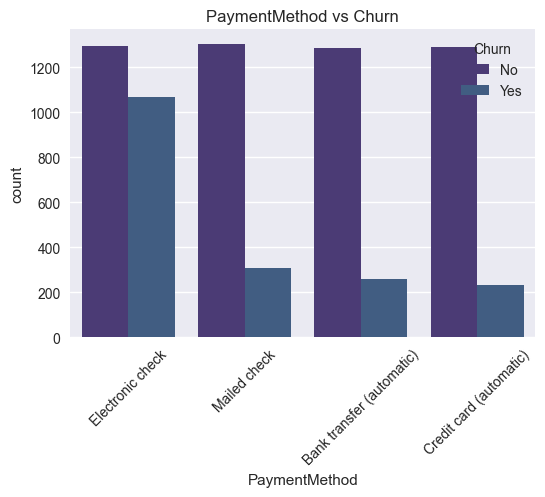

In [162]:
multi_cols_check = ['Contract', 'InternetService', 'PaymentMethod']

for col in multi_cols_check:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df_churn, x=col, hue='Churn')
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()

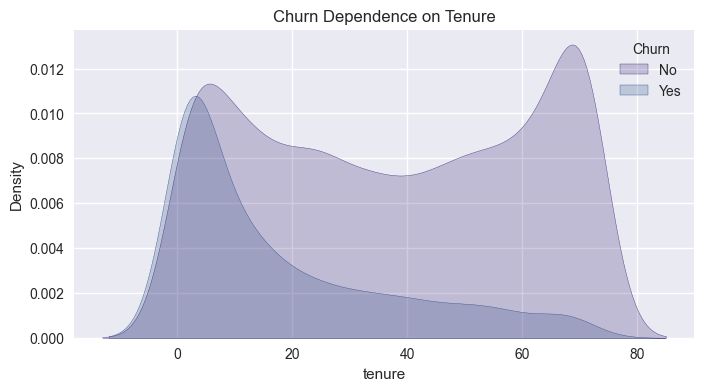

In [163]:
plt.figure(figsize=(8,4))
sns.kdeplot(data=df_churn, x="tenure", hue="Churn", fill=True)
plt.title("Churn Dependence on Tenure")
plt.show()

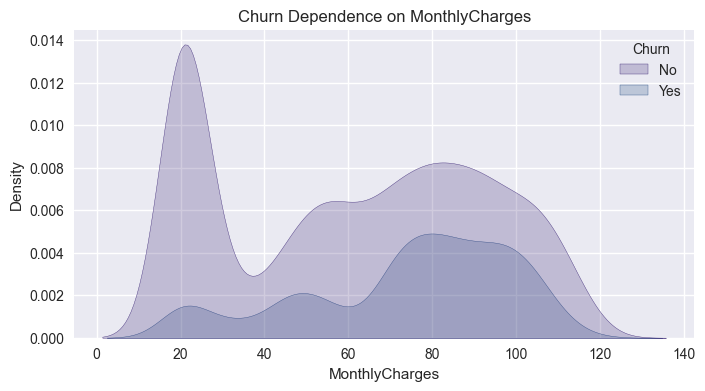

In [164]:
plt.figure(figsize=(8,4))
sns.kdeplot(data=df_churn, x="MonthlyCharges", hue="Churn", fill=True)
plt.title("Churn Dependence on MonthlyCharges")
plt.show()

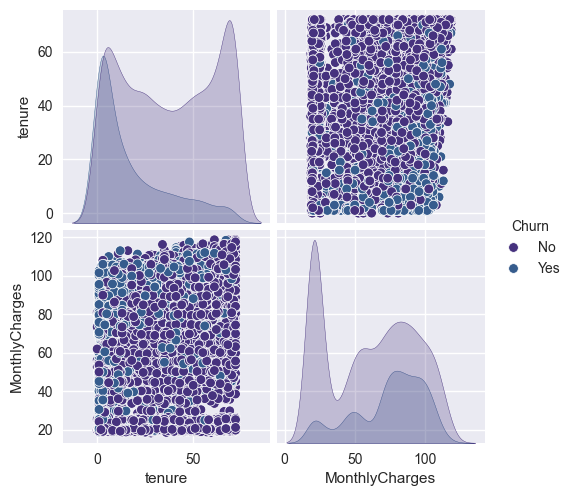

In [165]:
sns.pairplot(df_churn[numeric_cols + ['Churn']], hue="Churn")
plt.show()

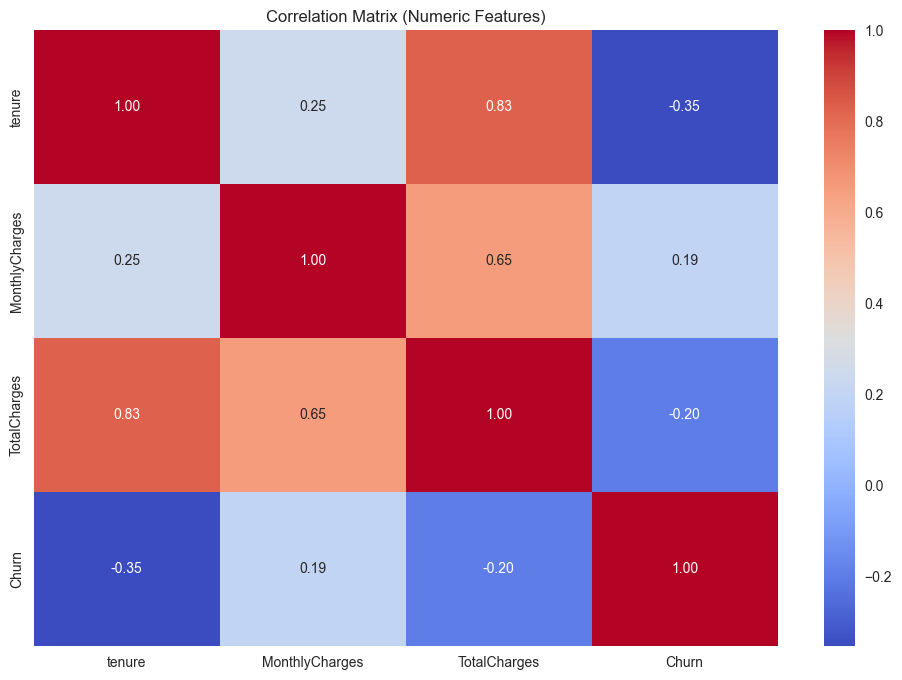

In [166]:
df_churn['TotalCharges'] = df_churn['TotalCharges'].replace(" ", np.nan)
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'])
df_churn['TotalCharges'].isna().sum()
df_churn = df_churn.dropna(subset=['TotalCharges'])
df_churn['Churn'] = df_churn['Churn'].map({'No': 0, 'Yes': 1})

plt.figure(figsize=(12,8))
corr = df_churn[numeric_cols + ['Churn']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

In [176]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_churn[numeric_cols]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["variance_inflation_factor"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

          feature  variance_inflation_factor
0          tenure                   6.332432
1  MonthlyCharges                   3.361075
2    TotalCharges                   8.079181


### Summary

* Month-to-month contracts -> churn much higher than other
* Fiber optic -> high churn
* Low tenure -> high churn
* High monthly charges -> high churn
* No internet service -> almost no churn
* PaperlessBilling = Yes -> high churn
* Electronic check -> high churn